In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
sales = pd.read_csv("C:/python_casestudies/Pandas Case Study4_Python Visualizations Case Study/SalesData.csv")
sales.head(10)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
5,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Jul,0.00,10525.24,0.0,4.0,1.03,1.45
6,2400,Account4,East,MINUTEMEN,PORTLAND,ME,High,Feb,2631.31,42812.62,1.0,17.0,1.08,0.99
7,2404,Account5,East,EMPIRE,BRIDGEPORT,CT,Low,Mar,4153.89,3918.77,1.0,1.0,0.79,1.46
8,2406,Account6,East,BIG APPLE,JERSEY CITY,NJ,Med,Mar,0.00,6951.86,0.0,2.0,1.12,1.02
9,2408,Account7,East,BIG APPLE,JERSEY CITY,NJ,High,Aug,0.00,10994.54,0.0,4.0,1.11,1.54


### 1. Compare Sales by region for 2016 with 2015 using bar chart

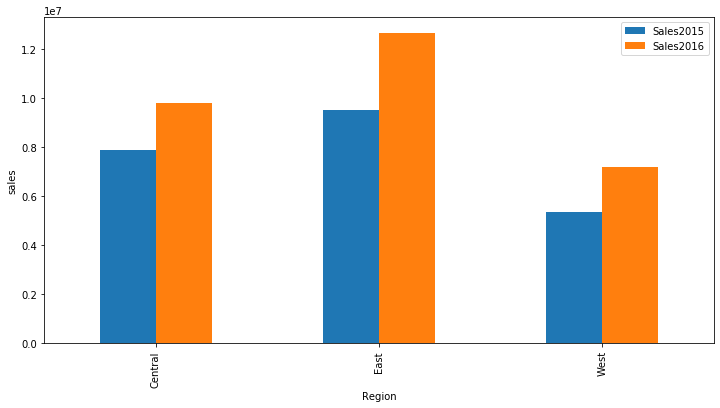

In [10]:
# sales1 = sales.groupby(['...']).aggregate(...) or .agg(..)

sales1 = sales.groupby('Region')['Sales2015', 'Sales2016'].sum()
sales1graph=sales1.plot.bar(figsize=(12,6))
plt.ylabel("sales")
plt.show()

### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

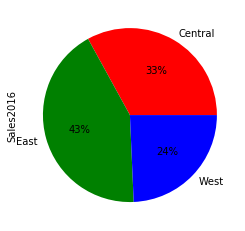

In [28]:
# sales2 = sales.groupby(['...']).aggregate({})

sales2 = sales.groupby('Region').Sales2016.sum()
sales2.plot(kind='pie',
            colors=['r', 'g', 'b'],
            autopct='%1.0f%%', # to get percentage and round off appropriately
            fontsize=10, 
            subplots='true')
plt.show()

### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

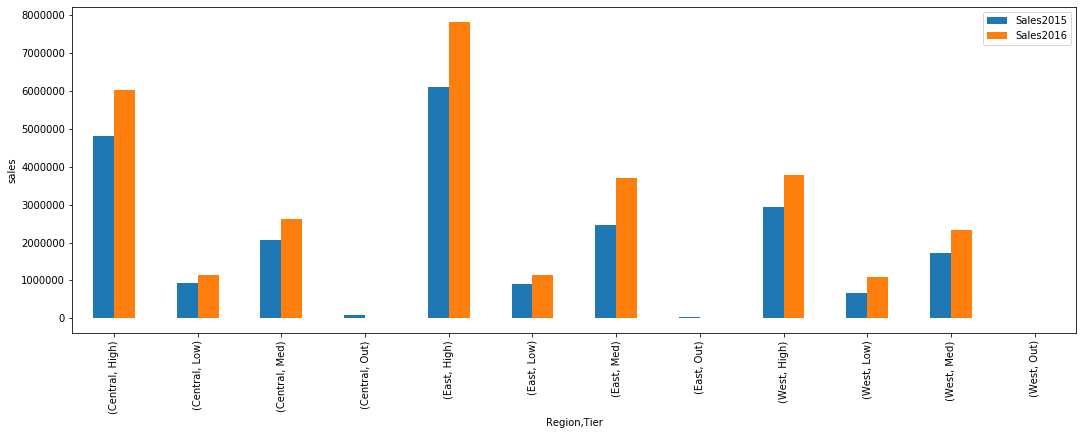

In [34]:
sales3 = sales.groupby(['Region', 'Tier'])['Sales2015', 'Sales2016'].sum()

sales3graph=sales3.plot.bar(figsize=(18,6))
plt.ylabel("sales")
plt.show()

### 4. In East region, which state registered a decline in 2016 as compared to 2015?

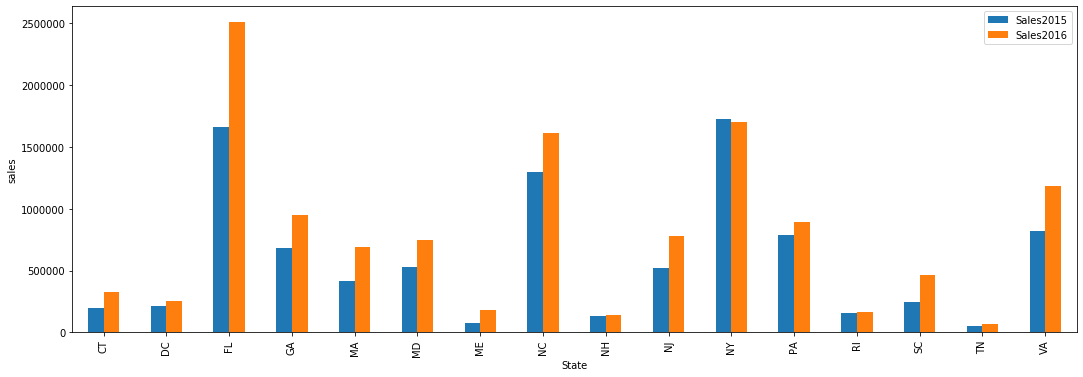

NewYork State registered a decline in 2016 as compared to 2015


In [42]:
#selecting east region using loc function.
sales4 = sales.loc[sales.Region == 'East', ['Region', 'State', 'Sales2015', 'Sales2016']].reset_index(drop = True)

#aggregating state wise sales in the 2015 and 2016
sales4 = sales4.groupby('State')['Sales2015', 'Sales2016'].sum()

sales4graph=sales4.plot.bar(figsize=(18,6))
plt.ylabel("sales")
plt.show()
print("NewYork State registered a decline in 2016 as compared to 2015")

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

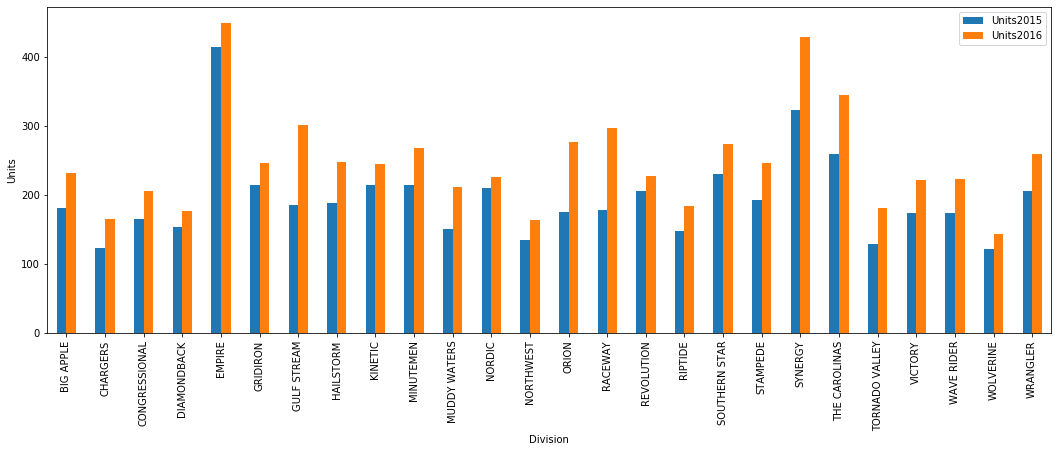

No Division has registered a decline in number of units sold in 2016 as compared to 2015


In [52]:
sales5 = sales.loc[sales.Tier == 'High', ['Tier', 'Division', 'Units2015', 'Units2016']].reset_index(drop = True)

sales5 = sales5.groupby('Division')['Units2015', 'Units2016'].sum()

sales5graph=sales5.plot.bar(figsize=(18,6))
plt.ylabel("Units")
plt.show()
print("No Division has registered a decline in number of units sold in 2016 as compared to 2015")

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
### •	Jan - Mar : Q1

### •	Apr - Jun : Q2

### •	Jul - Sep : Q3

### •	Oct - Dec : Q4   


In [53]:
month =sales["Month"]

In [54]:
quarter = []
for x in month :
    if x in ["Jan","Feb","Mar"]:
        quarter.append("Q1")
    elif x in ["Apr","May","Jun"]:
        quarter.append("Q2")
    elif x in ["Jul","Aug","Sep"]:
        quarter.append("Q3")
    else:
        quarter.append("Q4")

In [59]:
sales["Qtr"] = pd.Series(quarter)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot


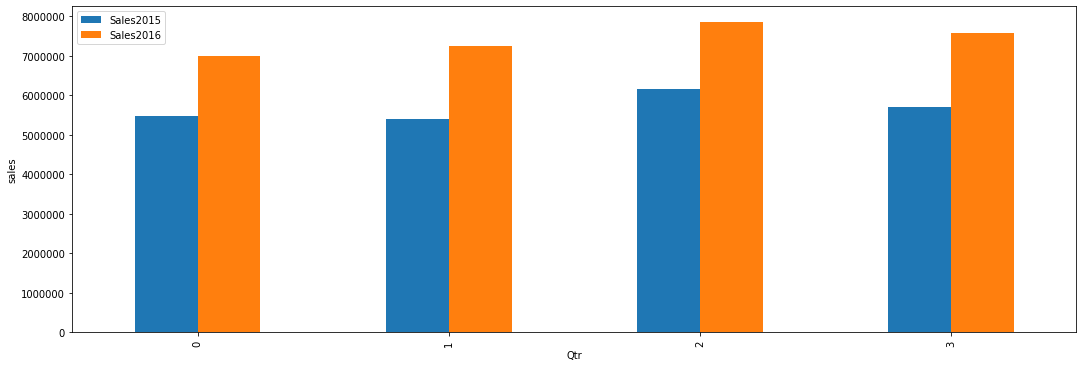

In [72]:
sales7 = sales.groupby('Qtr')['Sales2015', 'Sales2016'].sum().reset_index()

sales7graph=sales7.plot(kind = 'bar', figsize=(18,6))
plt.ylabel("sales")
plt.xlabel("Qtr")
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [76]:
sales8 = sales.pivot_table(index = 'Qtr', columns = 'Tier', values = 'Sales2016', aggfunc = 'sum')
sales8

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,-3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


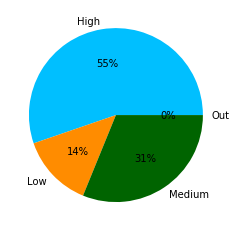

In [81]:
plt.pie(x = sales8.loc['Q1',:], 
            labels=['High', 'Low', 'Medium', 'Out'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%')
plt.show()

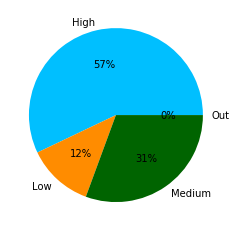

In [82]:
plt.pie(x = sales8.loc['Q2',:], 
            labels=['High', 'Low', 'Medium', 'Out'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%')
plt.show()

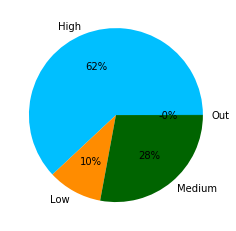

In [83]:
plt.pie(x = sales8.loc['Q3',:], 
            labels=['High', 'Low', 'Medium', 'Out'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%')
plt.show()

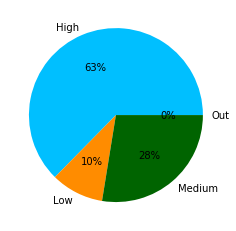

In [84]:
plt.pie(x = sales8.loc['Q4',:], 
            labels=['High', 'Low', 'Medium', 'Out'], 
            colors=['deepskyblue', 'darkorange', 'darkgreen'],
            autopct='%1.0f%%')
plt.show()